In [1]:
#Exercise - Housing Prices Competition for Kaggle Learn Users

##### To Do

- Load in the train data for the Housing prices Competition.
- Understand the data
- build a model on train data
- make prediction on test
- submit predictions on the kaggle competition.

In [28]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [74]:
#load in data

df = pd.read_csv('../data/Housing Prices Competition/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
df.columns.shape

(81,)

In [14]:
df.shape

(1460, 81)

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/tmp/ipykernel_5858/354934317.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

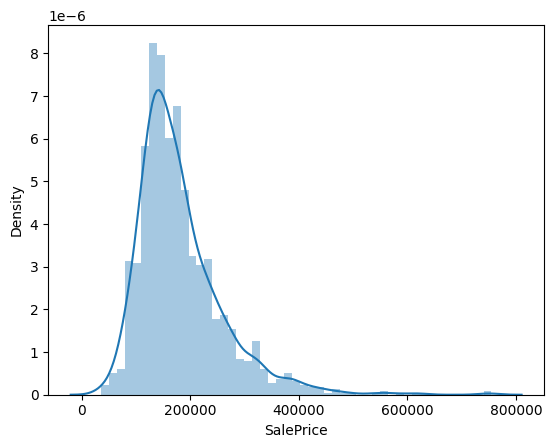

In [16]:
# identifying outliers
# plot distribution of target variable
import seaborn as sns
sns.distplot(df['SalePrice'])


In [75]:
# remove outliers from the target values    
# remove outliers that are having a z score of more than 2.5 
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['SalePrice']))
df = df[z<2.5]

/tmp/ipykernel_5858/3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

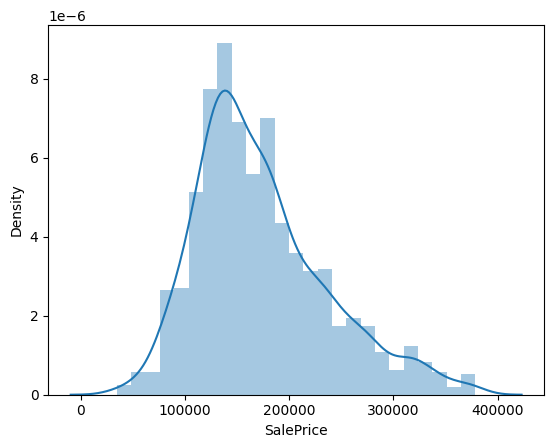

In [18]:
sns.distplot(df['SalePrice'])

In [21]:
df.shape

(1420, 81)

## DTA cleaning


In [76]:
print(df.isnull().sum().to_list())

[0, 0, 0, 256, 0, 0, 1329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 866, 7, 0, 0, 0, 37, 37, 38, 37, 0, 38, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 690, 81, 81, 81, 0, 0, 81, 81, 0, 0, 0, 0, 0, 0, 0, 1414, 1142, 1366, 0, 0, 0, 0, 0, 0]


<Axes: >

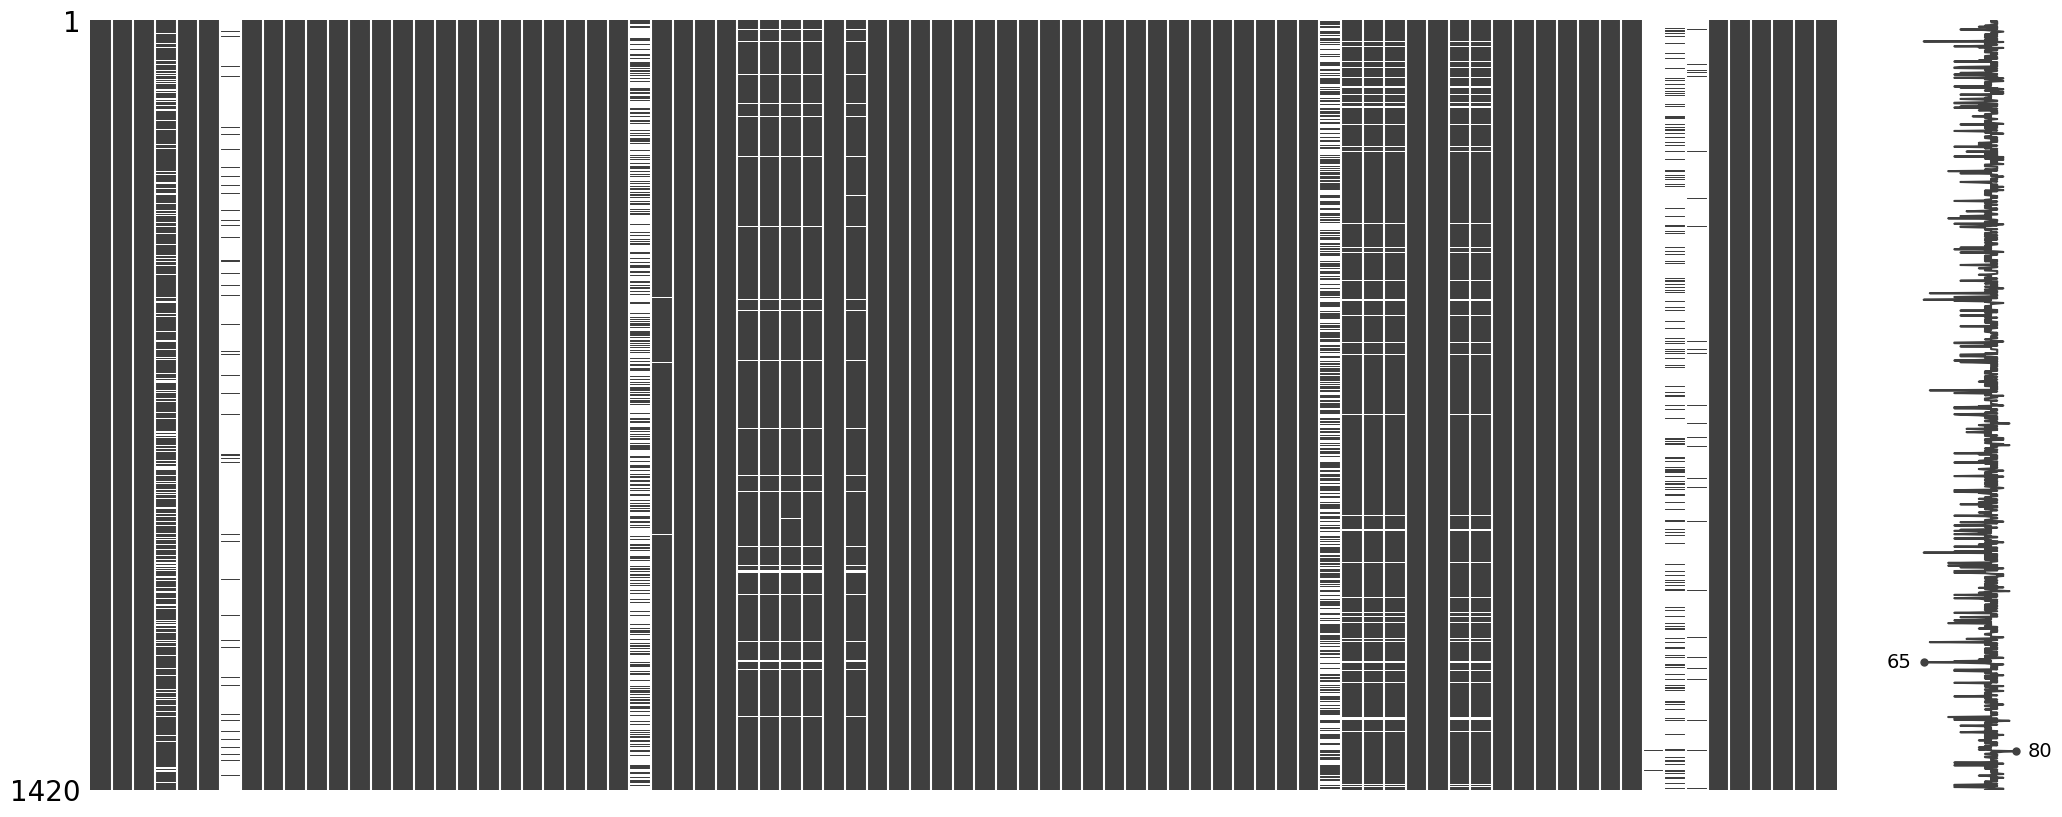

In [20]:
# visualize missing data 
import missingno as msno
msno.matrix(df)


In [77]:
# identify columns with missing values and print them all 
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Electrical         1
MasVnrArea         7
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
LotFrontage      256
FireplaceQu      690
MasVnrType       866
Fence           1142
Alley           1329
MiscFeature     1366
PoolQC          1414
dtype: int64

In [78]:
# remove features that are having more than 30 missing values 
missing = missing[missing > 30]
df = df.drop(missing.index, axis=1)

In [79]:
# now remove rows with missing values
df = df.dropna()

In [80]:
df.shape

(1412, 64)

## Feature engineering


In [81]:
# start selecting features for the model
# identify and separate numerical and categorical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()



In [82]:
categorical 

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [83]:
# embed categorical columns in ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[categorical] = encoder.fit_transform(df[categorical]) 


In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000


In [92]:
# split data into training and testing sets
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# split to train and test data  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

# make predictions

y_pred = model.predict(X_test)

# evaluate the model

# mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# r squared value
r_squared = model.score(X_test, y_test)
print(r_squared)

r_squared = r2_score(y_test, y_pred)
print(r_squared)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(mae)

# visualize the tree





0.7505741952505497
0.7505741952505497
22081.671378091873


In [94]:
## putting all into a pipeline 


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# define the pipeline
numerical_transformer = SimpleImputer(strategy='mean')
#categorical transformer with ordinal encoding

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical), ('cat', categorical_transformer, categorical)])

model = DecisionTreeRegressor(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(r_squared)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(mae)




ValueError: A given column is not a column of the dataframe